In [2]:
import pandas_datareader as pdr

Steps -
1. We will collect the data
2. Preprocessing the stock data 
3. Create an stacked LSTM Model
4. Predict the test data and plot the output
5. Predict the future 30 days and plot the output

In [5]:
key = 'e78ee8b5cb905a92421abea23c26cca9e933a6cb'
df = pdr.get_data_tiingo('AAPL', api_key = key)

C:\Users\91790\AppData\Local\Temp\ipykernel_9028\256902521.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key = key)


In [6]:
df.to_csv('AAPL.csv')

In [9]:
import pandas as pd
data = pd.read_csv('AAPL.csv')
data.head(4)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-07-23 00:00:00+00:00,191.61,191.96,189.56,190.68,15989365,45.775378,45.858993,45.285636,45.553203,63957460,0.0,1.0
1,AAPL,2018-07-24 00:00:00+00:00,193.00,193.66,192.05,192.45,18697898,46.107448,46.265121,45.880494,45.976053,74791592,0.0,1.0
2,AAPL,2018-07-25 00:00:00+00:00,194.82,194.85,192.43,193.06,16826483,46.542243,46.549410,45.971275,46.121782,67305932,0.0,1.0
3,AAPL,2018-07-26 00:00:00+00:00,194.21,195.96,193.61,194.61,19075964,46.396515,46.814588,46.253176,46.492075,76303856,0.0,1.0


In [14]:
data['symbol'].unique().sum()

'AAPL'

In [17]:
data['divCash'].unique()

array([0.   , 0.73 , 0.77 , 0.82 , 0.205, 0.22 , 0.23 , 0.24 ])

In [18]:
data['splitFactor'].unique()

array([1., 4.])

In [19]:
close_col = data.reset_index()['close']
close_col.shape

(1256,)

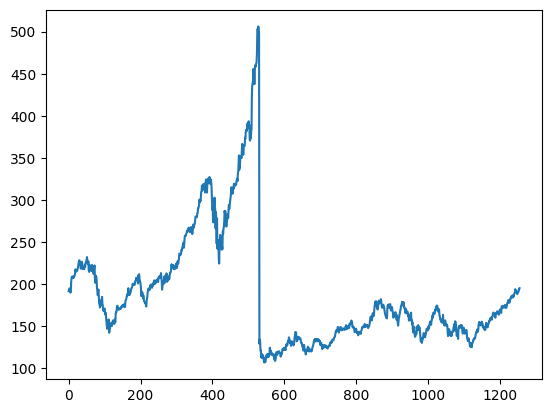

In [21]:
import matplotlib.pyplot as plt
plt.plot(close_col)

In [22]:
# LSTM are very much sensitive to scale of data 
# thus we need to scale this data using min max scaler 

import numpy as np

In [23]:
close_col

0       191.61
1       193.00
2       194.82
3       194.21
4       190.98
         ...  
1251    190.54
1252    190.69
1253    193.99
1254    193.73
1255    195.10
Name: close, Length: 1256, dtype: float64

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))
close_col = scaler.fit_transform(np.array(close_col).reshape(-1,1))

In [25]:
close_col

array([[0.21232311],
       [0.21580463],
       [0.22036318],
       ...,
       [0.21828428],
       [0.21763306],
       [0.2210645 ]])

In [28]:
# train test split techniques

# cross validation
# random seed
# for time series data -> 

train_size = int(len(close_col)*0.65)
test_size = len(close_col) - train_size
train_data, test_data = close_col[0:train_size, :], close_col[train_size:len(close_col), :1 ]

In [29]:
len(train_data)

816

In [30]:
len(test_data)

440

In [31]:
# Timesteps 
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [32]:
# reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [35]:
print(X_train)

[[0.21232311 0.21580463 0.22036318 ... 0.15719474 0.15476518 0.15594239]
 [0.21580463 0.22036318 0.21883532 ... 0.15476518 0.15594239 0.16057608]
 [0.22036318 0.21883532 0.21074515 ... 0.15594239 0.16057608 0.14687539]
 ...
 [0.05127113 0.0465623  0.05074515 ... 0.09129618 0.09031935 0.09009393]
 [0.0465623  0.05074515 0.05024421 ... 0.09031935 0.09009393 0.08683782]
 [0.05074515 0.05024421 0.05011897 ... 0.09009393 0.08683782 0.085335  ]]


In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(715, 100)
(339, 100)
(715,)
(339,)


In [39]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [44]:
# Creating the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()

# layers
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')



In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_5 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose = 1)

Epoch 1/100
12/12 [==============================] - 40s 846ms/step - loss: 0.0443 - val_loss: 0.0011
Epoch 2/100
12/12 [==============================] - 5s 419ms/step - loss: 0.0148 - val_loss: 0.0043
Epoch 3/100
12/12 [==============================] - 5s 406ms/step - loss: 0.0123 - val_loss: 4.3469e-04
Epoch 4/100
12/12 [==============================] - 4s 365ms/step - loss: 0.0096 - val_loss: 7.6623e-04
Epoch 5/100
12/12 [==============================] - 5s 390ms/step - loss: 0.0094 - val_loss: 0.0015
Epoch 6/100
12/12 [==============================] - 5s 425ms/step - loss: 0.0082 - val_loss: 4.5541e-04
Epoch 7/100
12/12 [==============================] - 5s 408ms/step - loss: 0.0074 - val_loss: 3.7612e-04
Epoch 8/100
12/12 [==============================] - 5s 393ms/step - loss: 0.0067 - val_loss: 2.9571e-04
Epoch 9/100
12/12 [==============================] - 4s 360ms/step - loss: 0.0076 - val_loss: 5.6968e-04
Epoch 10/100
12/12 [==============================] - 6s 463ms/ste

In [1]:
import tensorflow as tf 
tf.__version__

'2.12.0'

In [2]:
train_pred = model.predict(X_train)
test_pred = model.predcit(X_test)

NameError: name 'model' is not defined

In [ ]:
train_predict = scaler.inverse_transform(train_pred)
test_predict = scaler.inverse_transform(test_pred)

In [ ]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

In [ ]:
math.sqrt(mean_squared_error(y_test, test_predict))